# What is the force on an artificial barrier?

I'm going to create two systems for comparison. First, the sawtooth system we've dicussed in the past: two sawtooth waves exactly out of phase with each other. The second is the same system, but with a barrier placed directly adjacent to the minimum on the apo surface.

There is no offset between the surfaces other than what is plotted. The catalytic rate is 312 per second, the substrate concentration is 1 M, and the intersurface prefactor is $3 \times 10^{6}$ per mole per second.

Here is how the surfaces look, with the barrier shown as a faint red line.

In [302]:
# Initialization
import sys, os
sys.path.insert(0, os.path.abspath('../../'))
from motors.simulation import Simulation
from motors.plot import *
from motors.models import *
prepare_plot()

import matplotlib as mpl
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [303]:
# Uperturbed system
this = Simulation(data_source = 'manual')
this.unbound = [saw(i, 50) for i in range(50)]
this.bound   = [saw(i + 25, 50) for i in range(50)]
this.C_intersurface = 10.0 ** 6  # per mole per second
this.offset_factor = 0  # kcal per mol
this.catalytic_rate = 312.0  # per second
this.cSubstrate = 10**0
this.simulate(user_energies=True)

del this
this = Simulation(data_source='adk_md_data')
this.cSubstrate = 10**-1
this.name = 'psiSER41'
this.simulate()

In [304]:
# Blocked system
blocked = Simulation(data_source = 'manual')
blocked.unbound = [saw(i, 50) for i in range(50)]
blocked.bound   = [saw(i + 25, 50) for i in range(50)]
blocked.C_intersurface = 10.0 ** 6  # per mole per second
blocked.offset_factor = 0  # kcal per mol
blocked.catalytic_rate = 312.0  # per second
blocked.cSubstrate = 10**0

blocked.barrier = True
blocked.barrier_bin = 26

blocked.simulate(user_energies=True)

del blocked

blocked = Simulation(data_source='adk_md_data')
blocked.name = 'psiSER41'
blocked.cSubstrate = 10**-1
blocked.barrier = True
blocked.barrier_bin = 26

blocked.simulate()

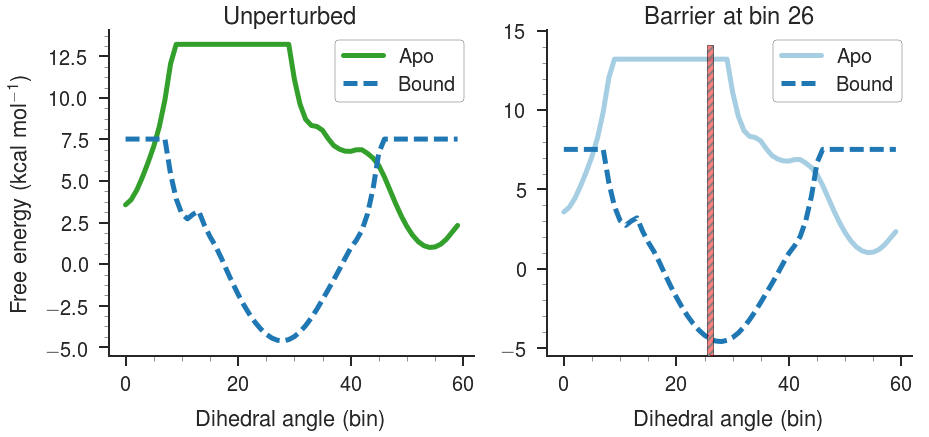

In [305]:
# Plot free energy surfaces
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.unbound, color=this.unbound_clr, label='Apo')
ax1.plot(this.bound, color=this.bound_clr, ls='--', label='Bound')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Free energy (kcal mol$^{-1}$)')
ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')

ax2 = plt.subplot(grid[0, 1])

ax2.plot(blocked.unbound, color=cmap[0], label='Apo')
ax2.plot(blocked.bound, color=cmap[1], ls='--', label='Bound')

ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
# ax2.axvline(26, -1, 1, c='r', ls=':', lw=1)
mpl.rcParams['hatch.color'] = '0.5'
mpl.rcParams['hatch.linewidth'] = '2'
bar = ax2.bar(26, ax2.get_ylim()[1]-ax2.get_ylim()[0], 1, bottom=ax2.get_ylim()[0], 
              color='red', alpha=0.5, edgecolor='none', lw=1, hatch='///', zorder=10)

ax2.set_title('Barrier at bin 26')
paper_plot(fig)

The effect of the barrier is to zero the transition rate from bin 26 to bin 27 on both surfaces. (More properly, I suppose, the barrier should be at bin 26.5.)

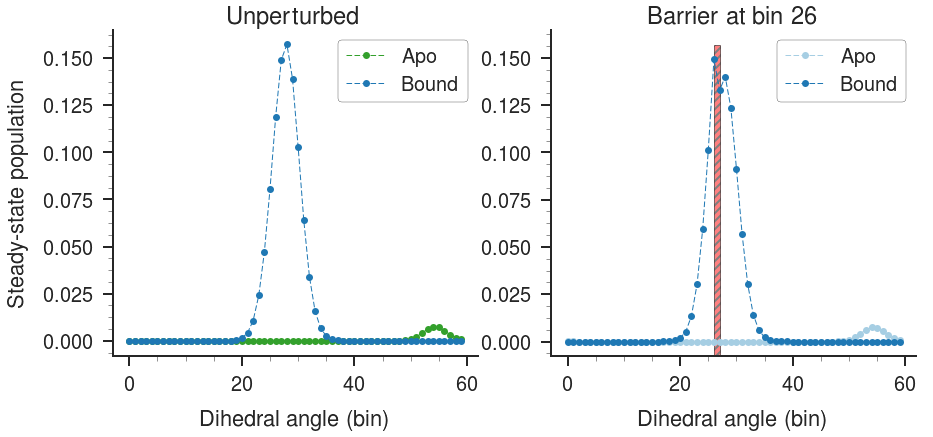

In [320]:
# Plot the steady-state populations
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.ss[0:this.bins], color=this.unbound_clr, marker='o', ls='--', lw=1, label='Apo')
ax1.plot(this.ss[this.bins:2*this.bins], color=this.bound_clr, ls='--', marker='o', lw=1, label='Bound')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population')
ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')

ax2 = plt.subplot(grid[0, 1])

ax2.plot(blocked.ss[0:this.bins], color=cmap[0], marker='o', ls='--', lw=1,label='Apo')
ax2.plot(blocked.ss[this.bins:2*this.bins], color=cmap[1], marker='o', ls='--', lw=1, label='Bound')

ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
bar = ax2.bar(26.5, ax2.get_ylim()[1]-ax2.get_ylim()[0], 1, bottom=ax2.get_ylim()[0], 
              color='red', alpha=0.5, edgecolor='none', lw=1, hatch='///', zorder=0)
ax2.set_title('Barrier at bin 26')
paper_plot(fig)

Moving the barrier doesn't seem to affect the steady-state population very much. The steady-state populations look very similiar regardless of where the barrier is -- and remarkably like the steady-state population in the absence of the barrier.

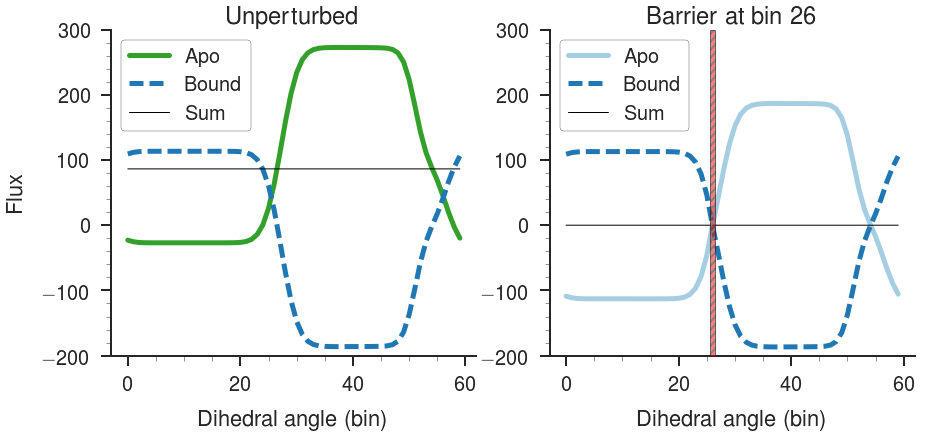

In [292]:
# Plot flux
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.flux_u, color=this.unbound_clr, label='Apo')
ax1.plot(this.flux_b, color=this.bound_clr, ls='--', label='Bound')
ax1.plot(this.flux_u + this.flux_b, color='k', lw=1, label='Sum')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Flux')
ax1.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')
ax1.set_ylim([-200, 300])

ax2 = plt.subplot(grid[0, 1])
ax2.plot(blocked.flux_u, color=cmap[0], label='Apo')
ax2.plot(blocked.flux_b, color=cmap[1], ls='--', label='Bound')
ax2.plot(blocked.flux_u + blocked.flux_b, color='k', lw=1, label='Sum')
ax2.set_ylim([-200, 300])


ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
bar = ax2.bar(26, ax2.get_ylim()[1]-ax2.get_ylim()[0], 1, bottom=ax2.get_ylim()[0], 
              color='red', alpha=0.5, edgecolor='none', lw=1, hatch='///', zorder=10)
ax2.set_title('Barrier at bin 26')
paper_plot(fig)

But what is the population difference across the barrier?

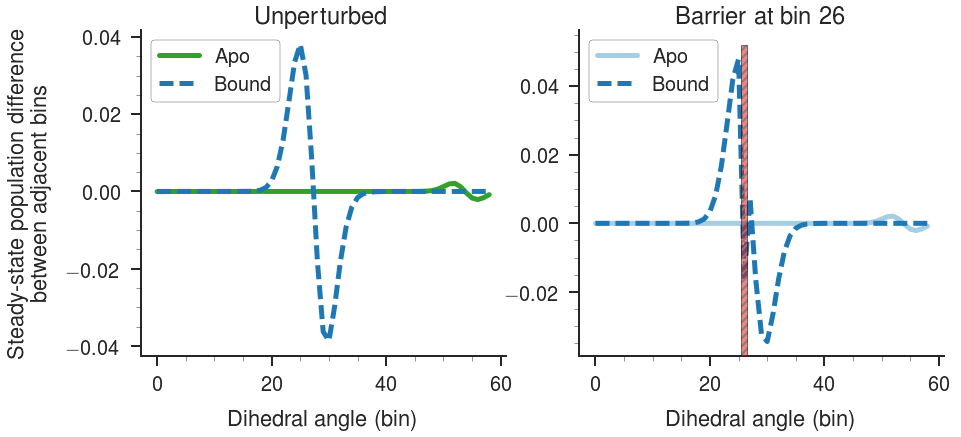

In [293]:
# Plot steady-state population differences
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(np.diff(this.ss[0:this.bins]), color=this.unbound_clr, label='Apo')
ax1.plot(np.diff(this.ss[this.bins:2*this.bins]), color=this.bound_clr, ls='--', label='Bound')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population difference\nbetween adjacent bins')
ax1.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')
#ax1.set_ylim([-80, 80])

ax2 = plt.subplot(grid[0, 1])
ax2.plot(np.diff(blocked.ss[0:blocked.bins]), color=cmap[0], label='Apo')
ax2.plot(np.diff(blocked.ss[blocked.bins:2*blocked.bins]), color=cmap[1], ls='--', label='Bound')
# ax2.set_ylim([-80, 80])

ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
bar = ax2.bar(26, ax2.get_ylim()[1]-ax2.get_ylim()[0], 1, bottom=ax2.get_ylim()[0], 
              color='red', alpha=0.5, edgecolor='none', lw=1, hatch='///', zorder=10)
ax2.set_title('Barrier at bin 26')
paper_plot(fig)

These plots are dominated by the population change caused by the energy drop.

In [298]:
print('Unperturbed system')
print('Apo')
for bn in range(24, 28):
    print('Bin {}\tPopulation {}'.format(bn, this.ss[bn]))
print('Bound')
for bn in range(24, 28):
    print('Bin {}\tPopulation {}'.format(bn, this.ss[this.bins + bn]))

print('Blocked system')
print('Apo')
for bn in range(24, 28):
    print('Bin {}\tPopulation {}'.format(bn, blocked.ss[bn]))
print('Bound')
for bn in range(24, 28):
    print('Bin {}\tPopulation {}'.format(bn, blocked.ss[blocked.bins + bn]))


Unperturbed system
Apo
Bin 24	Population 4.749033725395084e-09
Bin 25	Population 4.741708403609926e-09
Bin 26	Population 4.432036184526523e-09
Bin 27	Population 3.6773395462476952e-09
Bound
Bin 24	Population 0.047303455951945815
Bin 25	Population 0.08075669794378375
Bin 26	Population 0.11886474551366111
Bin 27	Population 0.14901867176916037
Blocked system
Apo
Bin 24	Population 2.0553003365532522e-08
Bin 25	Population 2.149134397471784e-08
Bin 26	Population 2.2050084232992022e-08
Bin 27	Population 1.807317362257816e-09
Bound
Bin 24	Population 0.05939300660682399
Bin 25	Population 0.10139604009539398
Bin 26	Population 0.14924352832047078
Bin 27	Population 0.13268612235365235


In [321]:
bin_width = 2 * np.pi / 50

print('Unperturbed system')
print('Bin\tPopulation\tForce'.expandtabs(16))
print('-'*80)
print('Apo')
for bn in range(26, 28):
    force = this.ss[bn] / bin_width * 0.593
    print('{0}\t{1:+2.7f}\t{2:+2.7f}'.format(bn, this.ss[bn], force).expandtabs(16))
print('Bound')
for bn in range(26, 28):
    force = this.ss[this.bins + bn] / bin_width * 0.593
    print('{0}\t{1:+2.7f}\t{2:+2.7f}'.format(bn, this.ss[this.bins + bn], force).expandtabs(16))

print('-'*80)
print('Blocked system')
print('Bin\tPopulation\tForce'.expandtabs(16))
print('-'*80)
print('Apo')
for bn in range(26, 28):
    force = blocked.ss[bn] / bin_width * 0.593
    print('{0}\t{1:+2.7f}\t{2:+2.7f}'.format(bn, blocked.ss[bn], force).expandtabs(16))
    
print('Bound')
for bn in range(26, 28):
    force = blocked.ss[blocked.bins + bn] / bin_width * 0.593
    print('{0}\t{1:+2.7f}\t{2:+2.7f}'.format(bn, blocked.ss[blocked.bins + bn], force).expandtabs(16))

Unperturbed system
Bin             Population      Force
--------------------------------------------------------------------------------
Apo
26              +0.0000000      +0.0000000
27              +0.0000000      +0.0000000
Bound
26              +0.1188647      +0.5609161
27              +0.1490187      +0.7032108
--------------------------------------------------------------------------------
Blocked system
Bin             Population      Force
--------------------------------------------------------------------------------
Apo
26              +0.0000000      +0.0000001
27              +0.0000000      +0.0000000
Bound
26              +0.1492435      +0.7042719
27              +0.1326861      +0.6261384


In [67]:
from motors.analysis import summarize_power_and_load

In [68]:
summarize_power_and_load()

In [242]:
def summarize_power_and_load(debug=True, negative=False):
    
#     this = Simulation(data_source = 'manual')
#     this.unbound = [saw(i, 50) for i in range(50)]
#     this.bound   = [saw(i + 25, 50)-10 for i in range(50)]
#     this.C_intersurface = 10.0 ** 6  # per mole per second
#     this.offset_factor = 0  # kcal per mol
#     this.catalytic_rate = 1000.0  # per second
#     this.cSubstrate = 10**3

    this = Simulation(data_source='adk_md_data')
    this.name='psiSER41'
    this.cSubstrate = 10**-1
    this.load = True
    slope = 0.000
    increment = 0.00000001
    
    
    loads, power_given_load, flux_given_load = [], [], []
    iteration = 0
    print('#\tLoad\tFlux\tPower\tMax power'.expandtabs(16))
    
    while True:
        if negative:
            this.load_slope = -slope
        else:
            this.load_slope = slope
        # this.simulate(user_energies=True)
        this.simulate()

        flux = np.mean(this.flux_u + this.flux_b)
        power = this.load_slope * np.mean(this.flux_u + this.flux_b)
        
        loads.append(this.load_slope)
        flux_given_load.append(flux)
        power_given_load.append(power)
        max_power = max(power_given_load)
        max_power_index = power_given_load.index(max_power)
        print('{0}\t{1:2.7f}\t{2:+2.7f}\t{3:+2.7f}\t{4:2.7f}'.format(iteration,this.load_slope, flux, power, max_power).expandtabs(16))


        if negative:
            if flux > 0:
                min_flux = np.absolute(np.array(flux_given_load)).min()
                min_index = np.argmin(np.absolute(np.array(flux_given_load)))
                max_power = np.absolute(np.array(power_given_load)).max()
                max_index = np.argmax(np.absolute(np.array(power_given_load)))
                print('-'*80)
                print('Minimum flux = {0:+2.7f} cycle/second at '
                      'stall torque = {1:+2.7f} kcal/mol/cycle'.format(min_flux, loads[min_index]))
                print('Maximum power = {0:+2.7f} kcal/mol/second at '
                      'torque = {1:+2.7f} kcal/mol/cycle'.format(max_power, loads[max_index]))
                break
        else:
            if flux < 0:
                min_flux = np.absolute(np.array(flux_given_load)).min()
                min_index = np.argmin(np.absolute(np.array(flux_given_load)))
                max_power = np.absolute(np.array(power_given_load)).max()
                max_index = np.argmax(np.absolute(np.array(power_given_load)))
                print('-'*80)
                print('Minimum flux = {0:+2.7f} cycle/second at '
                      'stall torque = {1:+2.7f} kcal/mol/cycle'.format(min_flux, loads[min_index]))
                print('Maximum power = {0:+2.7f} kcal/mol/second at '
                      'torque = {1:+2.7f} kcal/mol/cycle'.format(max_power, loads[max_index]))

                break
        
        if iteration % 100 == 0:
            increment *= 10
        if iteration > 1000:
            print('I give up.')
        slope += increment
        iteration += 1
    del this

In [243]:
summarize_power_and_load()

#               Load            Flux            Power           Max power
0               0.0000000       +86.3353548     +0.0000000      0.0000000
1               0.0000001       +86.3347913     +0.0000086      0.0000086
2               0.0000002       +86.3353538     +0.0000173      0.0000173
3               0.0000003       +86.3354467     +0.0000259      0.0000259
4               0.0000004       +86.3348840     +0.0000345      0.0000345
5               0.0000005       +86.3349996     +0.0000432      0.0000432
6               0.0000006       +86.3353388     +0.0000518      0.0000518
7               0.0000007       +86.3349024     +0.0000604      0.0000604
8               0.0000008       +86.3349561     +0.0000691      0.0000691
9               0.0000009       +86.3349731     +0.0000777      0.0000777
10              0.0000010       +86.3349969     +0.0000863      0.0000863
11              0.0000011       +86.3346815     +0.0000950      0.0000950
12              0.0000012       +86.33

123             0.0000330       +86.3338218     +0.0028490      0.0028490
124             0.0000340       +86.3339698     +0.0029354      0.0029354
125             0.0000350       +86.3335406     +0.0030217      0.0030217
126             0.0000360       +86.3336321     +0.0031080      0.0031080
127             0.0000370       +86.3341039     +0.0031944      0.0031944
128             0.0000380       +86.3337172     +0.0032807      0.0032807
129             0.0000390       +86.3339229     +0.0033670      0.0033670
130             0.0000400       +86.3337279     +0.0034533      0.0034533
131             0.0000410       +86.3335040     +0.0035397      0.0035397
132             0.0000420       +86.3336282     +0.0036260      0.0036260
133             0.0000430       +86.3335928     +0.0037123      0.0037123
134             0.0000440       +86.3333763     +0.0037987      0.0037987
135             0.0000450       +86.3332822     +0.0038850      0.0038850
136             0.0000460       +86.33

240             0.0005100       +86.3162724     +0.0440213      0.0440213
241             0.0005200       +86.3157117     +0.0448842      0.0448842
242             0.0005300       +86.3155522     +0.0457472      0.0457472
243             0.0005400       +86.3150990     +0.0466102      0.0466102
244             0.0005500       +86.3148441     +0.0474732      0.0474732
245             0.0005600       +86.3145694     +0.0483362      0.0483362
246             0.0005700       +86.3143715     +0.0491992      0.0491992
247             0.0005800       +86.3135650     +0.0500619      0.0500619
248             0.0005900       +86.3134901     +0.0509250      0.0509250
249             0.0006000       +86.3131045     +0.0517879      0.0517879
250             0.0006100       +86.3124947     +0.0526506      0.0526506
251             0.0006200       +86.3120332     +0.0535135      0.0535135
252             0.0006300       +86.3118069     +0.0543764      0.0543764
253             0.0006400       +86.31

360             0.0071100       +86.0729048     +0.6119784      0.6119784
361             0.0072100       +86.0688669     +0.6205565      0.6205565
362             0.0073100       +86.0659580     +0.6291422      0.6291422
363             0.0074100       +86.0615826     +0.6377163      0.6377163
364             0.0075100       +86.0579816     +0.6462954      0.6462954
365             0.0076100       +86.0546174     +0.6548756      0.6548756
366             0.0077100       +86.0505571     +0.6634498      0.6634498
367             0.0078100       +86.0467926     +0.6720255      0.6720255
368             0.0079100       +86.0434607     +0.6806038      0.6806038
369             0.0080100       +86.0398724     +0.6891794      0.6891794
370             0.0081100       +86.0360223     +0.6977521      0.6977521
371             0.0082100       +86.0319857     +0.7063226      0.7063226
372             0.0083100       +86.0285126     +0.7148969      0.7148969
373             0.0084100       +86.02

/media/dslochower/data-beta/projects/nonequilibrium-master/motors/simulation.py:244: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


422             0.0331100       +85.1143064     +2.8181347      2.8181347
423             0.0341100       +85.0771558     +2.9019818      2.9019818
424             0.0351100       +85.0405385     +2.9857733      2.9857733
425             0.0361100       +85.0038672     +3.0694896      3.0694896
426             0.0371100       +84.9664554     +3.1531052      3.1531052
427             0.0381100       +84.9297163     +3.2366715      3.2366715
428             0.0391100       +84.8926802     +3.3201527      3.3201527
429             0.0401100       +84.8560752     +3.4035772      3.4035772
430             0.0411100       +84.8189067     +3.4869053      3.4869053
431             0.0421100       +84.7823455     +3.5701846      3.5701846
432             0.0431100       +84.7453364     +3.6533715      3.6533715
433             0.0441100       +84.7087271     +3.7365020      3.7365020
434             0.0451100       +84.6716760     +3.8195393      3.8195393
435             0.0461100       +84.63

544             0.5511100       +66.0765823     +36.4154653     36.4154653
545             0.5611100       +65.7101483     +36.8706213     36.8706213
546             0.5711100       +65.3441258     +37.3186837     37.3186837
547             0.5811100       +64.9775560     +37.7591076     37.7591076
548             0.5911100       +64.6117029     +38.1926237     38.1926237
549             0.6011100       +64.2456030     +38.6186744     38.6186744
550             0.6111100       +63.8792241     +39.0372326     39.0372326
551             0.6211100       +63.5132901     +39.4487396     39.4487396
552             0.6311100       +63.1473409     +39.8529183     39.8529183
553             0.6411100       +62.7809277     +40.2494806     40.2494806
554             0.6511100       +62.4149947     +40.6390272     40.6390272
555             0.6611100       +62.0493307     +41.0214330     41.0214330
556             0.6711100       +61.6836302     +41.3965010     41.3965010
557             0.6811100

In [197]:
import pandas as pd

In [201]:
adk_df = pd.read_pickle('../../motors/pickles/adk-concentration-scan.pickle')

# Increase barrier height gradually...

In [361]:
for barrier_height in np.arange(0, 100, 1):
    blocked = Simulation(data_source='adk_md_data')
    blocked.name = 'psiSER41'
    blocked.cSubstrate = 10**-1

    blocked.barrier = True
    blocked.barrier_bin = 30
    blocked.barrier_height = barrier_height
    
    blocked.simulate()
    
    bin_width = bin_width = 2 * np.pi / 60
    apo_force = blocked.ss[blocked.barrier_bin + 1] / bin_width * 0.593 - blocked.ss[blocked.barrier_bin] / bin_width * 0.593
    bound_force = blocked.ss[blocked.bins + blocked.barrier_bin + 1] / bin_width * 0.593 - blocked.ss[blocked.bins + blocked.barrier_bin] / bin_width * 0.593
    print('{0}\t{1:+5.7f}\t{2:+5.7f}\t{3:+5.7f}'.format(barrier_height, apo_force, bound_force, apo_force + bound_force))


0	+0.0000000	-0.2191350	-0.2191349
1	+0.0000000	-0.2191350	-0.2191350
2	-0.0000001	-0.2191349	-0.2191350
3	-0.0000006	-0.2191341	-0.2191347
4	-0.0000027	-0.2191299	-0.2191325
5	-0.0000069	-0.2191037	-0.2191105
6	-0.0000097	-0.2189531	-0.2189628
7	-0.0000106	-0.2181482	-0.2181588
8	-0.0000107	-0.2138977	-0.2139085
9	-0.0000107	-0.1917552	-0.1917659
10	-0.0000103	-0.0838675	-0.0838778
11	-0.0000089	+0.3094437	+0.3094348
12	-0.0000066	+0.9533025	+0.9532960
13	-0.0000053	+1.3036493	+1.3036440
14	-0.0000050	+1.3947330	+1.3947280
15	-0.0000049	+1.4131749	+1.4131700
16	-0.0000049	+1.4167046	+1.4166997
17	-0.0000049	+1.4173778	+1.4173729
18	-0.0000049	+1.4175005	+1.4174956
19	-0.0000049	+1.4175209	+1.4175160
20	-0.0000049	+1.4175287	+1.4175238
21	-0.0000049	+1.4175291	+1.4175242
22	-0.0000049	+1.4175307	+1.4175258
23	-0.0000049	+1.4175279	+1.4175230
24	-0.0000049	+1.4175290	+1.4175241
25	-0.0000049	+1.4175298	+1.4175249
26	-0.0000049	+1.4175285	+1.4175236
27	-0.0000049	+1.4175285	+1.4175236
28

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-01  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         +5.40e-05  cycle second**-1
Peak                      +1.80e+02  cycle second**-1


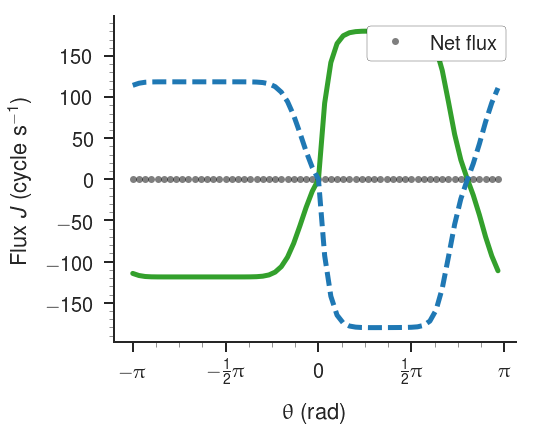

In [362]:
plot_flux(blocked)

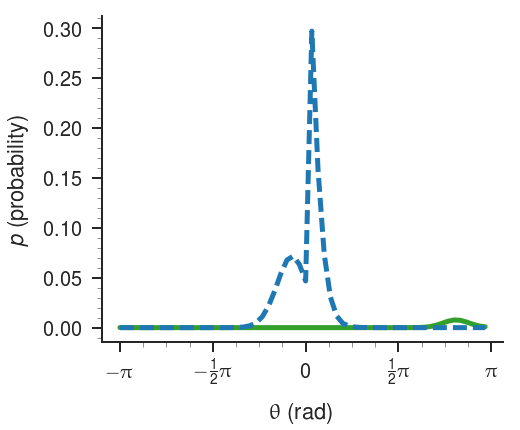

In [363]:
plot_ss(blocked)

In [ ]:
plot